IN THIS PROJECT I WILL WORK WITH KAGGLE'S "PlayStation Sales and Metadata (PS3,PS4,PS5)" DATA SET

THE SCOPE OF THIS PERSONAL PROJECT IS TO CREATE A DATA PIPELINE

LOAD -> EXPLORE -> CLEAN -> TRANSFROM -> ANALYZE -> VISUALIZE

1) LOAD THE DATA

In [204]:
import pandas as pd

In [ ]:
play_station_raw_data = pd.read_csv("PlayStation Sales and Metadata (PS3PS4PS5) (Oct 2025).csv")
play_station_raw_data.head()

,Game,Console,Name,Publisher,Developer,Total Shipped,Total Sales,NA Sales,PAL Sales,Japan Sales,Other Sales,Release Date,Last Update,rating,ratings_count,metacritic,genres,platforms
0,PS3_Grand Theft Auto V,PS3,Grand Theft Auto V,Rockstar Games,Rockstar North,0.0,20320000.0,6370000.0,9850000.0,990000.0,3120000.0,2013-09-17,NaN,4.47,7225.0,92.0,Action,"PC, PlayStation 5, Xbox One, PlayStation 4, Xb..."
1,PS4_Grand Theft Auto V,PS4,Grand Theft Auto V,Rockstar Games,Rockstar North,0.0,19390000.0,6060000.0,9710000.0,600000.0,3020000.0,2014-11-18,2018-01-03,4.47,7225.0,92.0,Action,"PC, PlayStation 5, Xbox One, PlayStation 4, Xb..."
2,PS4_Call of Duty: Black Ops 3,PS4,Call of Duty: Black Ops 3,Activision,Treyarch,0.0,15090000.0,6180000.0,6050000.0,410000.0,2440000.0,2015-11-06,2018-01-14,NaN,NaN,NaN,NaN,NaN
3,PS4_Red Dead Redemption 2,PS4,Red Dead Redemption 2,Rockstar Games,Rockstar Games,0.0,13940000.0,5260000.0,6210000.0,210000.0,2260000.0,2018-10-26,2018-11-02,4.59,5357.0,96.0,Action,"PC, Xbox One, PlayStation 4"
4,PS3_Call of Duty: Black Ops II,PS3,Call of Duty: Black Ops II,Activision,Treyarch,0.0,13800000.0,4990000.0,5880000.0,650000.0,2280000.0,2012-11-13,NaN,3.96,1417.0,74.0,"Shooter, Action","PC, Xbox One, Xbox 360, PlayStation 3, Wii U"


In [235]:
play_station_raw_data_initial = pd.read_csv("PlayStation Sales and Metadata (PS3PS4PS5) (Oct 2025).csv")

UNDERSTANDING THE DATA

In [206]:
play_station_raw_data.describe()

,Total Shipped,Total Sales,NA Sales,PAL Sales,Japan Sales,Other Sales,rating,ratings_count,metacritic
count,4.963000e+03,4.963000e+03,4.963000e+03,4.963000e+03,4.963000e+03,4.963000e+03,2847.000000,2847.000000,1530.000000
mean,9.352005e+04,3.008906e+05,1.178199e+05,1.170482e+05,2.178723e+04,4.426154e+04,2.762455,269.917106,73.826144
std,8.977504e+05,1.055158e+06,4.052999e+05,4.946509e+05,8.250273e+04,1.639967e+05,1.531923,618.110338,11.532527
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,21.000000
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000,8.000000,68.000000
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.380000,44.000000,76.000000
75%,0.000000e+00,1.600000e+05,7.000000e+04,3.000000e+04,0.000000e+00,2.000000e+04,3.830000,205.500000,82.000000
max,2.269000e+07,2.032000e+07,6.370000e+06,9.850000e+06,2.170000e+06,3.120000e+06,4.760000,7225.000000,97.000000


In [207]:
play_station_raw_data.dtypes

Game              object
Console           object
Name              object
Publisher         object
Developer         object
Total Shipped    float64
Total Sales      float64
NA Sales         float64
PAL Sales        float64
Japan Sales      float64
Other Sales      float64
Release Date      object
Last Update       object
rating           float64
ratings_count    float64
metacritic       float64
genres            object
platforms         object
dtype: object

I SAW THAT RELEASE DATE WAS AN OBJECT, SO FIRST THINK FIRST I CHANGE THAT IN A DATE TIME TYPE SO WE CAN USE IT MOREA EASILY IF WE WANT TO DO SOME ANALYZES ON DATES

In [208]:

play_station_raw_data["Release Date"] = pd.to_datetime(play_station_raw_data['Release Date'], errors='coerce')
play_station_raw_data.dtypes

Game                     object
Console                  object
Name                     object
Publisher                object
Developer                object
Total Shipped           float64
Total Sales             float64
NA Sales                float64
PAL Sales               float64
Japan Sales             float64
Other Sales             float64
Release Date     datetime64[ns]
Last Update              object
rating                  float64
ratings_count           float64
metacritic              float64
genres                   object
platforms                object
dtype: object

In [209]:
play_station_raw_data["Release Year"] = play_station_raw_data["Release Date"].dt.year.astype('Int64')
play_station_raw_data["Release Month"] = play_station_raw_data["Release Date"].dt.month.astype('Int64')


NOW I'VE SEPARATED THE MONTHS AND YEAR AS FEATURES. IT WILL BE FASTER TO ACCES THOSE DATA WHEN WE ARE DOING DATA EXPLORATION

FINDING DATA THAT IS NULL, 0 or NaN

In [210]:
play_station_raw_data.isnull().sum()

Game                0
Console             0
Name                0
Publisher           0
Developer           0
Total Shipped       0
Total Sales         0
NA Sales            0
PAL Sales           0
Japan Sales         0
Other Sales         0
Release Date     1437
Last Update      2162
rating           2116
ratings_count    2116
metacritic       3433
genres           2160
platforms        2116
Release Year     1437
Release Month    1437
dtype: int64

In [211]:
described_data_console = play_station_raw_data.groupby('Console').describe() 
described_data_console["Release Year"]["min"]


Console
PS3    2006.0
PS4    2013.0
PS5    2015.0
Name: min, dtype: float64

In [212]:
described_data_console["Release Year"]["max"]

Console
PS3    2020.0
PS4    2023.0
PS5    2026.0
Name: max, dtype: float64

I SAVED THE DESCRIBED DATA THAT CONTAINS MIN, MAX, STD AND OTHER NUMERIC DESCRIPTION IN A SEPARATE DF CALLED DESCRIBED_DATA_CONSOLE SO I CAN GET THE INFO MUCH EASIER

FOR EXAMPLE WE CAN SEE THE MIN AND MAX RELEASE YEAS FOR EACH CONSOLE. WE CAN CONCLUDE THAT THE FOR PS3 GAMES WERE MADE BETWEEN 2006 AND 2020

In [213]:
play_station_raw_data.isnull().sum()

Game                0
Console             0
Name                0
Publisher           0
Developer           0
Total Shipped       0
Total Sales         0
NA Sales            0
PAL Sales           0
Japan Sales         0
Other Sales         0
Release Date     1437
Last Update      2162
rating           2116
ratings_count    2116
metacritic       3433
genres           2160
platforms        2116
Release Year     1437
Release Month    1437
dtype: int64

In [214]:
good_columns = [col for col in play_station_raw_data.columns if play_station_raw_data[col].notnull().all()]
good_columns

['Game',
 'Console',
 'Name',
 'Publisher',
 'Developer',
 'Total Shipped',
 'Total Sales',
 'NA Sales',
 'PAL Sales',
 'Japan Sales',
 'Other Sales']

IN THIS WAY I SAVED ALL THE COLUMN FROM PLAY_STATION_RAW_DATA THAT ARE COMPLETE, THAT DON'T HAVE NULL VALUES. NOTNULL() METHODS RETURNS TRUE IF WE HAVE VALUES THAT ARE NOT NULL IN THAT SPECIFIC FEATURE, ALL() IS MAKING SURE THAT ALL THE RETURNS ARE TRUE, AND IF ALL ARE TRUE WE CAN ADD THAT COLUMN TO THE LIST

In [215]:
clean_play_station_data = pd.DataFrame(columns=good_columns)
clean_play_station_data[good_columns] = play_station_raw_data[good_columns].copy()

In [216]:
clean_play_station_data.head()

,Game,Console,Name,Publisher,Developer,Total Shipped,Total Sales,NA Sales,PAL Sales,Japan Sales,Other Sales
0,PS3_Grand Theft Auto V,PS3,Grand Theft Auto V,Rockstar Games,Rockstar North,0.0,20320000.0,6370000.0,9850000.0,990000.0,3120000.0
1,PS4_Grand Theft Auto V,PS4,Grand Theft Auto V,Rockstar Games,Rockstar North,0.0,19390000.0,6060000.0,9710000.0,600000.0,3020000.0
2,PS4_Call of Duty: Black Ops 3,PS4,Call of Duty: Black Ops 3,Activision,Treyarch,0.0,15090000.0,6180000.0,6050000.0,410000.0,2440000.0
3,PS4_Red Dead Redemption 2,PS4,Red Dead Redemption 2,Rockstar Games,Rockstar Games,0.0,13940000.0,5260000.0,6210000.0,210000.0,2260000.0
4,PS3_Call of Duty: Black Ops II,PS3,Call of Duty: Black Ops II,Activision,Treyarch,0.0,13800000.0,4990000.0,5880000.0,650000.0,2280000.0


I'VE CREATED A NEW DATAFRAME, A CLEANER ONE WITH VALUES THAT ARE NOT NULL, NOW WE NEED TO FOCUS ON DATA THAT NEEDS CLEANING

In [217]:
play_station_raw_data.isnull().sum()

Game                0
Console             0
Name                0
Publisher           0
Developer           0
Total Shipped       0
Total Sales         0
NA Sales            0
PAL Sales           0
Japan Sales         0
Other Sales         0
Release Date     1437
Last Update      2162
rating           2116
ratings_count    2116
metacritic       3433
genres           2160
platforms        2116
Release Year     1437
Release Month    1437
dtype: int64

In [218]:
play_station_raw_data.dtypes

Game                     object
Console                  object
Name                     object
Publisher                object
Developer                object
Total Shipped           float64
Total Sales             float64
NA Sales                float64
PAL Sales               float64
Japan Sales             float64
Other Sales             float64
Release Date     datetime64[ns]
Last Update              object
rating                  float64
ratings_count           float64
metacritic              float64
genres                   object
platforms                object
Release Year              Int64
Release Month             Int64
dtype: object

In [219]:
numeric_with_median = ["Release Month", "Release Year","rating","ratings_count","metacritic"]
for data in numeric_with_median:
    play_station_raw_data[data] = play_station_raw_data[data].astype("float64")
    play_station_raw_data[data] = play_station_raw_data.groupby("Console")[data].transform(lambda x:x.fillna(x.median())).round()
play_station_raw_data.isnull().sum()


Game                0
Console             0
Name                0
Publisher           0
Developer           0
Total Shipped       0
Total Sales         0
NA Sales            0
PAL Sales           0
Japan Sales         0
Other Sales         0
Release Date     1437
Last Update      2162
rating              0
ratings_count       0
metacritic          0
genres           2160
platforms        2116
Release Year        0
Release Month       0
dtype: int64

SO WE LEFT ONLY WITH GENRES, PLATFORMS, LAST UPDATE AND RELEASE DATE. WE CAN DROP THE RELEASE YEAR BECAUSE WE ALREADY CREATED RELEASE YEAR AND RELEASE MONTH FEATURES.

In [220]:
del play_station_raw_data["Release Date"]


In [221]:
play_station_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4963 entries, 0 to 4962
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Game           4963 non-null   object 
 1   Console        4963 non-null   object 
 2   Name           4963 non-null   object 
 3   Publisher      4963 non-null   object 
 4   Developer      4963 non-null   object 
 5   Total Shipped  4963 non-null   float64
 6   Total Sales    4963 non-null   float64
 7   NA Sales       4963 non-null   float64
 8   PAL Sales      4963 non-null   float64
 9   Japan Sales    4963 non-null   float64
 10  Other Sales    4963 non-null   float64
 11  Last Update    2801 non-null   object 
 12  rating         4963 non-null   float64
 13  ratings_count  4963 non-null   float64
 14  metacritic     4963 non-null   float64
 15  genres         2803 non-null   object 
 16  platforms      2847 non-null   object 
 17  Release Year   4963 non-null   float64
 18  Release 

In [222]:
play_station_raw_data["Last Update"] = pd.to_datetime(play_station_raw_data['Last Update'], errors='coerce')
play_station_raw_data["Last Update Year"] = play_station_raw_data["Last Update"].dt.year
play_station_raw_data["Last Update Month"] = play_station_raw_data["Last Update"].dt.month

In [223]:
last_update = ["Last Update Year","Last Update Month"]
for update in last_update:
    play_station_raw_data[update] = play_station_raw_data.groupby(["Developer","Publisher"])[update].transform(lambda x:x.fillna(x.median()))
    play_station_raw_data[update] = play_station_raw_data[update].fillna(play_station_raw_data[update].median())


def median_for_missing_numeric(df = None, group = None, columns = None):
    for column in columns:
        df[column] = df.groupby(group)[column].transform(lambda x:x.fillna(x.median()))
        df[column] = df[column].fillna(df[column].median())
    return df

play_station_raw_data = median_for_missing_numeric(df=play_station_raw_data,group=["Developer", "Publisher"], columns=last_update)
play_station_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4963 entries, 0 to 4962
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Game               4963 non-null   object        
 1   Console            4963 non-null   object        
 2   Name               4963 non-null   object        
 3   Publisher          4963 non-null   object        
 4   Developer          4963 non-null   object        
 5   Total Shipped      4963 non-null   float64       
 6   Total Sales        4963 non-null   float64       
 7   NA Sales           4963 non-null   float64       
 8   PAL Sales          4963 non-null   float64       
 9   Japan Sales        4963 non-null   float64       
 10  Other Sales        4963 non-null   float64       
 11  Last Update        2801 non-null   datetime64[ns]
 12  rating             4963 non-null   float64       
 13  ratings_count      4963 non-null   float64       
 14  metacrit

I'VE COMPLETED THE LAST UPDATE YEAR AND LAST UPDATE MONTH WITH THE MISSING VALUES. I'VE ASSIGNED THE VALUES THAR WERE MISSING THE MEDIAN FOUND IN THE NON-NULL VALUES, GROUPED BY DEVELOPER AND PUBLISHER (LOGIC: SAME DEVELOPER WILL RELEASE UPDATES IN THE SAME PERIOD FOR DIFFERENT GAMES, SO IF IT IS ALSO THE SAME PUBLISHER THE CHANCES FOR GAMES TO HAVE UPDATES IN THE SAME YEAR ARE HIGHER)

SO WE HAVE 4963 TOTAL ROWS, WE ALSO HAVE MISSING VALUES FOR PLATFORMS SO WE CAN'T JUST DROP THE VALUES FOR THAT BECAUSE HALF OF THE DATA WILL BE LOST

WE CAN CREATE A FUNCTION FOR UPDATEING VALUES WITH MODES

In [224]:
def set_missing_values_to_mode (df=None, column = None, group=None, fallback_global = True):
    result = (df.groupby(group)[column].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x)) 
    # THIS VERIFIES IF THERE IS A          
    # GLOBAL MODE, IF IT IS WE USE THAT AS A DATA FOR OUR PLATFORM FEATURE
    if not df[column].mode().empty:
        global_item = df[column].mode()[0]
        result = df[column].fillna(global_item)
    return result

NOW WE CAN CALL THE FUNCTION FOR BOTH PLATFORMS AND GENRES

In [225]:
play_station_raw_data["platforms"] = set_missing_values_to_mode(df=play_station_raw_data, column="platforms", group=["Publisher", "Developer"])
play_station_raw_data["genres"] = set_missing_values_to_mode(df=play_station_raw_data, column="genres", group=["Publisher", "Developer"])

play_station_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4963 entries, 0 to 4962
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Game               4963 non-null   object        
 1   Console            4963 non-null   object        
 2   Name               4963 non-null   object        
 3   Publisher          4963 non-null   object        
 4   Developer          4963 non-null   object        
 5   Total Shipped      4963 non-null   float64       
 6   Total Sales        4963 non-null   float64       
 7   NA Sales           4963 non-null   float64       
 8   PAL Sales          4963 non-null   float64       
 9   Japan Sales        4963 non-null   float64       
 10  Other Sales        4963 non-null   float64       
 11  Last Update        2801 non-null   datetime64[ns]
 12  rating             4963 non-null   float64       
 13  ratings_count      4963 non-null   float64       
 14  metacrit

WE CAN USE THE SAME METHOD FOR THE GENRES FEATURE

In [226]:
del play_station_raw_data["Last Update"]

PERFECT! NOW WE HAVE CLEANED ALL THE DATA

In [227]:
clean_play_station_data = play_station_raw_data.copy()

IF WE HAVE THE CLEAN DATA FATAFRAME, LET'S CONTINUE USING THAT NAME FOR A BETTER UNDERSTANDING, AND SAVE IT IN A CSV FILE BECAUSE NOW WE HAVE CLEAN DATA

In [228]:
clean_play_station_data.to_csv("clean_PlayStation_Data_report.csv")

In [241]:
def data_quality_report(df, name="Dataset"):
    print(f"\n{'='*50}")
    print(f"DATA QUALITY REPORT: {name}")
    print(f"{'='*50}\n")
    
    print(f"Total rows: {len(df)}")
    print(f"Total columns: {len(df.columns)}")
    
    print(f"\n{'─'*50}")
    print("COMPLETENESS")
    print(f"{'─'*50}")
    missing = df.isnull().sum()
    missing_pct = (missing / len(df) * 100).round(2)
    
    quality_df = pd.DataFrame({
        'Missing': missing,
        'Missing %': missing_pct,
        'Complete %': 100 - missing_pct
    })
    quality_df = quality_df[quality_df['Missing'] > 0].sort_values('Missing', ascending=False)
    
    if len(quality_df) > 0:
        print(quality_df)
    else:
        print("✓ No missing values!")
    
    print(f"\n{'─'*50}")
    print("DUPLICATES")
    print(f"{'─'*50}")
    duplicates = df.duplicated().sum()
    print(f"Duplicate rows: {duplicates} ({duplicates/len(df)*100:.2f}%)")
    
    return quality_df

In [238]:
data_quality_report(play_station_raw_data_initial, "PlayStation Raw Data")



DATA QUALITY REPORT: PlayStation Raw Data

Total rows: 4,963
Total columns: 18

Memory usage: 3.17 MB

──────────────────────────────────────────────────
COMPLETENESS
──────────────────────────────────────────────────
               Missing  Missing %  Complete %
metacritic        3433      69.17       30.83
Last Update       2162      43.56       56.44
genres            2160      43.52       56.48
rating            2116      42.64       57.36
ratings_count     2116      42.64       57.36
platforms         2116      42.64       57.36
Release Date      1437      28.95       71.05

──────────────────────────────────────────────────
DUPLICATES
──────────────────────────────────────────────────
Duplicate rows: 0 (0.00%)


,Missing,Missing %,Complete %
metacritic,3433,69.17,30.83
Last Update,2162,43.56,56.44
genres,2160,43.52,56.48
rating,2116,42.64,57.36
ratings_count,2116,42.64,57.36
platforms,2116,42.64,57.36
Release Date,1437,28.95,71.05


In [239]:
data_quality_report(clean_play_station_data, "PlayStation Clean Data")


DATA QUALITY REPORT: PlayStation Clean Data

Total rows: 4,963
Total columns: 20

Memory usage: 2.97 MB

──────────────────────────────────────────────────
COMPLETENESS
──────────────────────────────────────────────────
✓ No missing values!

──────────────────────────────────────────────────
DUPLICATES
──────────────────────────────────────────────────
Duplicate rows: 0 (0.00%)


,Missing,Missing %,Complete %


SAME NUMBER ON ROWS, WE MANAGED TO KEEP ALL THE DATA. 2 MORE COLUMNS, +4 FROM THE RELEASE/UPDATE YEAR/MONTH AND -2 FROM THE RELEASE DATE AND LATEST UPDATE

COMPLETE THE FIRST PART OF THE PIPELINE: LOAD -> EXPLLORE -> CLEAN -> TRANSFORM

ANALYZE + VISUALIZATION

HERE WE WANT TO ANSWEAR THE FOLLOWING QUESTIONS:
 - WHICH REGION MADE THE MOST SALES?
 - WHAT IS THE MOST SOLD PLAYSTATION CONSOLE?
 - HOW DOES THE SALES LOOK OVER THE YEAR?
 - WHAT ARE THE MOST SOLD GENRES?
 - THERE ARE MORE SALES IN EUROPE OR IN ASIA?
 - CORELATIONS BETWEEN GAMES RATING AND THE AMOUNT SOLD?
 - ANY OTHER CORELATIONS?

In [254]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

1) WHICH REGION MADE THE MOST SALES?

In [244]:
clean_play_station_data.head(1)

,Game,Console,Name,Publisher,Developer,Total Shipped,Total Sales,NA Sales,PAL Sales,Japan Sales,Other Sales,rating,ratings_count,metacritic,genres,platforms,Release Year,Release Month,Last Update Year,Last Update Month
0,PS3_Grand Theft Auto V,PS3,Grand Theft Auto V,Rockstar Games,Rockstar North,0.0,20320000.0,6370000.0,9850000.0,990000.0,3120000.0,4.0,7225.0,92.0,Action,"PC, PlayStation 5, Xbox One, PlayStation 4, Xb...",2013.0,9.0,2018.0,1.0


In [273]:
regions = ["NA Sales", "PAL Sales","Japan Sales"]

regions_total = clean_play_station_data[regions].sum()
region_with_max = regions_total.idxmax()
region_max_val = int(regions_total.max()) 
print(f"{region_with_max} has the most with {region_max_val} copies sold")

NA Sales has the most with 584740000 copies sold


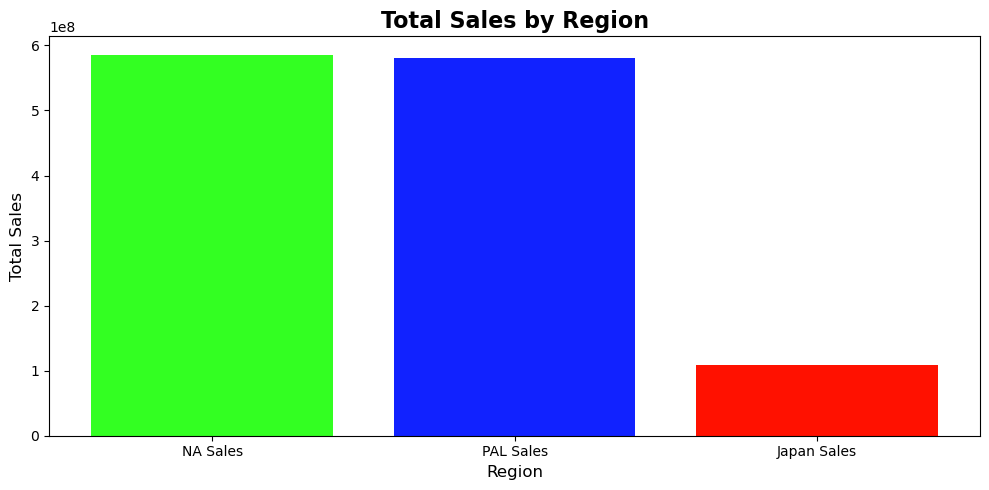

In [298]:
plt.figure(figsize=(10, 5))
plt.bar(regions, regions_total, color=['#3f2', '#12f', '#f10'])
plt.title('Total Sales by Region', fontsize=16, fontweight='bold')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.tight_layout()
plt.show()

AS WE CAN SEE NA AND EUROPEAN SALES ARE NECK IN NECK, WE CAN CREATE, THERE IS A 4 M MORE SALES FOR THE NA REGION

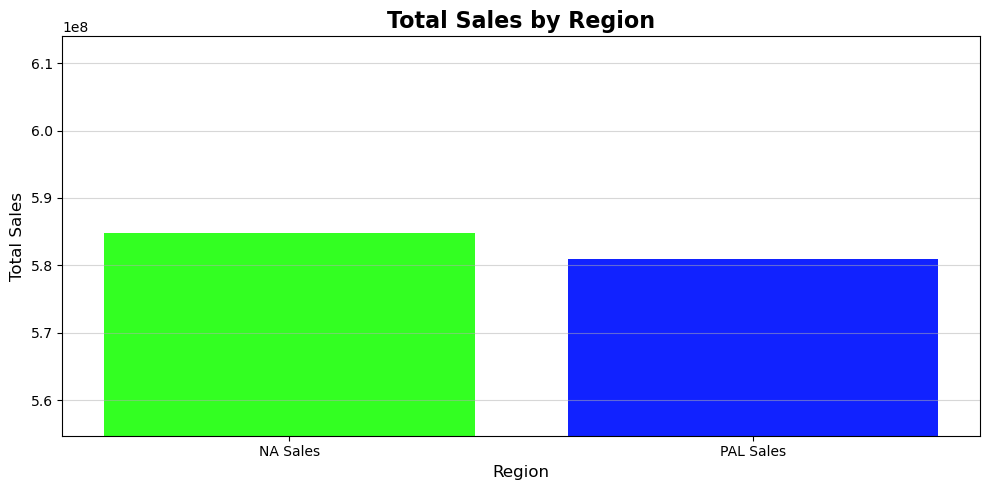

In [304]:
na_and_eu = ["NA Sales", "PAL Sales"]

regions_total_na_and_eu = clean_play_station_data[na_and_eu].sum()
region_with_max_na_and_eu = regions_total_na_and_eu.idxmax()
region_max_val_na_and_eu = int(regions_total_na_and_eu.max()) 

plt.figure(figsize=(10, 5))
plt.bar(na_and_eu, regions_total_na_and_eu, color=['#3f2', '#12f', '#f10'])
plt.title('Total Sales by Region', fontsize=16, fontweight='bold')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.ylim(bottom =554740000 )
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()